- **Aluno:** Giovanni Martins de Sá Júnior<br>
- **Disciplina:** Introdução à Inteligência Computacional<br>
- **Professor:** Cristiano Leite de Castro

# Tarefas

## Primeira atividade

Ler os capítulos 6 (até a seção 6.2), 8 e 9 do Livro *An Introduction to Statistical Learning - Python Edition*, incluindo as seção finais correspondentes ao Lab.

## Segunda atividade

Este exercício utiliza a base de dados de regressão College.csv. A ideia é prever o número de aplicações recebidas pela Universidade usando as variáveis preditoras da base de dados "*College*".<br>

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregamento de dados
df = pd.read_csv('College.csv')

# Exploração inicial
print("Dimensões do dataset: ", {df.shape})
print("Primeiros itens:")
print(df.head())

Dimensões do dataset:  {(777, 19)}
Primeiros itens:
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   P

- Divida o conjunto de dados em subconjuntos de treinamento (50%) e de teste (50%).

In [3]:
# Remocao da coluna 'nomes' e da variavel resposta
X = df.drop(['Apps', 'Unnamed: 0'], axis=1)
y = df['Apps']

# Codificacao de variaveis categoricas
X = pd.get_dummies(X, drop_first=True)

print("Dimensões após preparação: X:", X.shape, "y:", y.shape)

# Divisao de treinamento (50%) e teste (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Treino:", X_train.shape[0],"amostras")
print("Teste:", X_test.shape[0],"amostras")

Dimensões após preparação: X: (777, 17) y: (777,)
Treino: 388 amostras
Teste: 389 amostras


- Ajuste um modelo de regressão linear usando mínimos quadrados sobre os dados de treinamento e reporte o erro de teste obtido.

In [4]:
# Ajuste do modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Previsões e erro
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("="*50)
print("REGRESSÃO LINEAR - MÍNIMOS QUADRADOS")
print("="*50)
print(f"Erro quadrático médio (MSE): {mse_lr:.2f}")
print(f"Raíz do erro quadrático médio (RMSE): {np.sqrt(mse_lr):.2f}")

REGRESSÃO LINEAR - MÍNIMOS QUADRADOS
Erro quadrático médio (MSE): 1654196.51
Raíz do erro quadrático médio (RMSE): 1286.16


In [5]:
# Coeficientes
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lr.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nTop 10 variáveis mais importantes (em valor absoluto):")
print(coef_df.head(10))


Top 10 variáveis mais importantes (em valor absoluto):
       Variável  Coeficiente
16  Private_Yes  -649.504550
2     Top10perc    30.825430
12    S.F.Ratio    24.234765
10          PhD    -9.432663
15    Grad.Rate     8.469310
13  perc.alumni    -3.529694
3     Top25perc    -2.764894
0        Accept     1.421398
11     Terminal     1.248121
1        Enroll    -0.350860


- Ajuste um modelo de regressão Ridge com λ escolhido por validação cruzada com *k* folds e reporte o erro de teste obtido.

A regressão Ridge irá adicionar a penalização L2 aos coeficientes, indicando uma possível redução de overffiting e lidando melhor com multicolinearidade.

In [6]:
# Padronização dos dados para o Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buscar melhor lambda por validação cruzada
alphas = np.logspace(-3, 3, 50)
ridge_cv = GridSearchCV(Ridge(),
                        param_grid={'alpha': alphas},
                        cv=5,
                        scoring='neg_mean_squared_error')

ridge_cv.fit(X_train_scaled, y_train)

# Melhor modelo Ridge
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("\n" + "="*50)
print("REGRESSÃO RIDGE")
print("="*50)
print(f"Melhor alpha (λ): {ridge_cv.best_params_['alpha']:.4f}")
print(f"Erro quadrático médio (MSE): {mse_ridge:.2f}")
print(f"Raíz do erro quadrático médio (RMSE): {np.sqrt(mse_ridge):.2f}")


REGRESSÃO RIDGE
Melhor alpha (λ): 0.3728
Erro quadrático médio (MSE): 1662362.04
Raíz do erro quadrático médio (RMSE): 1289.33


In [7]:
# Coeficientes Ridge
ridge_coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': best_ridge.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nTop 10 variáveis mais importantes (Ridge):")
print(ridge_coef_df.head(10))


Top 10 variáveis mais importantes (Ridge):
       Variável  Coeficiente
0        Accept  3237.339380
2     Top10perc   529.563701
16  Private_Yes  -289.480758
14       Expend   283.861705
6      Outstate  -271.237527
1        Enroll  -265.582684
7    Room.Board   223.515788
10          PhD  -153.703283
15    Grad.Rate   151.689510
12    S.F.Ratio    93.041107


- Ajuste um modelo de regressão *LASSO* com λ escolhido por validação cruzada com *k* folds e reporte o erro de teste obtido, juntamente com o número de coeficientes diferentes de zero.

In [8]:
# Buscar melhor lambda para LASSO
lasso_cv = GridSearchCV(Lasso(max_iter=10000),
                        param_grid={'alpha': alphas},
                        cv=5,
                        scoring='neg_mean_squared_error')

lasso_cv.fit(X_train_scaled, y_train)

# Melhor modelo LASSO
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Número de coeficientes não zero
n_nonzero = np.sum(best_lasso.coef_ != 0)

print("\n" + "="*50)
print("REGRESSÃO LASSO")
print("="*50)
print(f"Melhor alpha (λ): {lasso_cv.best_params_['alpha']:.4f}")
print(f"Erro quadrático médio (MSE): {mse_lasso:.2f}")
print(f"Raíz do erro quadrático médio (RMSE): {np.sqrt(mse_lasso):.2f}")
print(f"Número de coeficientes diferentes de zero: {n_nonzero}")


REGRESSÃO LASSO
Melhor alpha (λ): 4.7149
Erro quadrático médio (MSE): 1684962.22
Raíz do erro quadrático médio (RMSE): 1298.06
Número de coeficientes diferentes de zero: 14


In [9]:
# Variáveis selecionadas pelo LASSO
lasso_coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': best_lasso.coef_
})
lasso_selected = lasso_coef_df[lasso_coef_df['Coeficiente'] != 0].sort_values('Coeficiente', key=abs, ascending=False)

print("\nVariáveis selecionadas pelo LASSO:")
print(lasso_selected)


Variáveis selecionadas pelo LASSO:
       Variável  Coeficiente
0        Accept  3167.194173
2     Top10perc   477.327503
16  Private_Yes  -274.221019
14       Expend   273.353101
6      Outstate  -247.650663
7    Room.Board   216.666101
1        Enroll  -205.859414
15    Grad.Rate   140.031692
10          PhD  -129.642102
12    S.F.Ratio    83.787113
13  perc.alumni   -46.204563
8         Books    21.754074
5   P.Undergrad   -20.184445
3     Top25perc    -5.438773


- Ajuste um modelo de regressão do tipo *Bagging* de árvores de decisão e reporte o erro de teste obtido.

In [10]:
# Bagging de árvores de decisão
bagging = BaggingRegressor(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

print("\n" + "="*50)
print("BAGGING - ÁRVORES DE DECISÃO")
print("="*50)
print(f"Erro quadrático médio (MSE): {mse_bagging:.2f}")
print(f"Raíz do erro quadrático médio (RMSE): {np.sqrt(mse_bagging):.2f}")


BAGGING - ÁRVORES DE DECISÃO
Erro quadrático médio (MSE): 4037424.64
Raíz do erro quadrático médio (RMSE): 2009.33


- Ajuste um modelo de regressão do tipo *Random Forest com *m = √p*, onde m é o número total de variáveis do problema. Reporte o erro de teste obtido. Mostre o grático de importância das variáveis e compare-o com as variáveis selecionadas pelo método *LASSO*.

In [11]:
# Random Forest com m = √p
m = int(np.sqrt(X.shape[1]))
rf = RandomForestRegressor(n_estimators=100, max_features=m, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\n" + "="*50)
print("RANDOM FOREST")
print("="*50)
print(f"Número de variáveis consideradas em cada split (m): {m}")
print(f"Erro quadrático médio (MSE): {mse_rf:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {np.sqrt(mse_rf):.2f}")


RANDOM FOREST
Número de variáveis consideradas em cada split (m): 4
Erro quadrático médio (MSE): 4407231.94
Raiz do erro quadrático médio (RMSE): 2099.34


In [12]:
# Importância das variáveis
importance_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf.feature_importances_
}).sort_values('Importância', ascending=False)

print("\nTop 10 variáveis mais importantes (Random Forest):")
print(importance_df.head(10))


Top 10 variáveis mais importantes (Random Forest):
       Variável  Importância
0        Accept     0.333501
1        Enroll     0.246066
4   F.Undergrad     0.149305
5   P.Undergrad     0.039323
10          PhD     0.032040
11     Terminal     0.025297
16  Private_Yes     0.022033
6      Outstate     0.021763
14       Expend     0.021378
15    Grad.Rate     0.020806


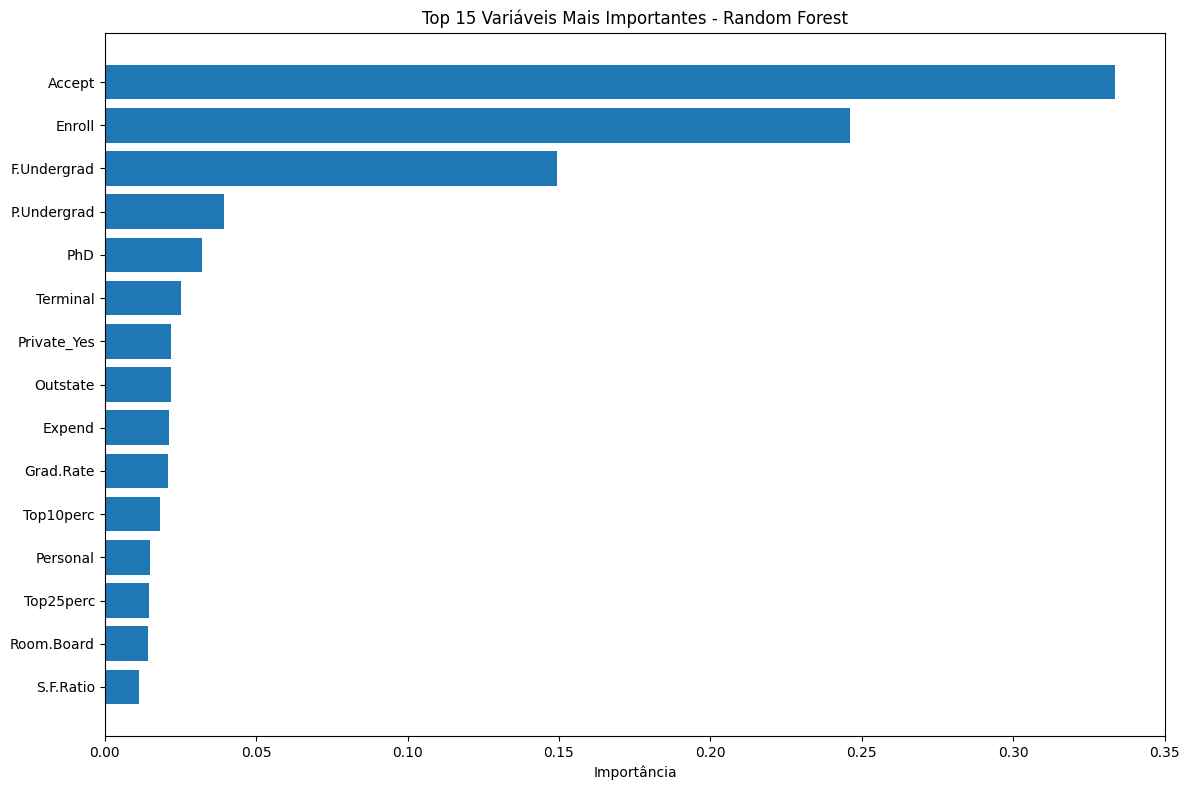

In [13]:
# Gráfico de importância
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(top_features['Variável'], top_features['Importância'])
plt.xlabel('Importância')
plt.title('Top 15 Variáveis Mais Importantes - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
# Comparação com LASSO
print("\n" + "="*50)
print("COMPARAÇÃO LASSO vs RANDOM FOREST")
print("="*50)
print("Variáveis selecionadas pelo LASSO:")
print(lasso_selected['Variável'].tolist())

print("\nTop variáveis do Random Forest:")
print(importance_df.head(len(lasso_selected))['Variável'].tolist())


COMPARAÇÃO LASSO vs RANDOM FOREST
Variáveis selecionadas pelo LASSO:
['Accept', 'Top10perc', 'Private_Yes', 'Expend', 'Outstate', 'Room.Board', 'Enroll', 'Grad.Rate', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Books', 'P.Undergrad', 'Top25perc']

Top variáveis do Random Forest:
['Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'PhD', 'Terminal', 'Private_Yes', 'Outstate', 'Expend', 'Grad.Rate', 'Top10perc', 'Personal', 'Top25perc', 'Room.Board']


In [15]:
# Verificar sobreposição
lasso_vars = set(lasso_selected['Variável'])
rf_top_vars = set(importance_df.head(len(lasso_selected))['Variável'])
overlap = lasso_vars.intersection(rf_top_vars)

print(f"\nVariáveis em comum: {overlap}")
print(f"Taxa de sobreposição: {len(overlap)/len(lasso_vars)*100:.1f}%")


Variáveis em comum: {'Grad.Rate', 'Top25perc', 'PhD', 'Private_Yes', 'Room.Board', 'Enroll', 'Outstate', 'Accept', 'P.Undergrad', 'Expend', 'Top10perc'}
Taxa de sobreposição: 78.6%


### Resumo comparativo final

In [16]:
# Tabela comparativa final
results = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Ridge', 'LASSO', 'Bagging', 'Random Forest'],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_bagging, mse_rf],
    'RMSE': [np.sqrt(mse_lr), np.sqrt(mse_ridge), np.sqrt(mse_lasso), 
             np.sqrt(mse_bagging), np.sqrt(mse_rf)],
    'N_Vars_LASSO': ['-', '-', n_nonzero, '-', '-']
})

print("\n" + "="*60)
print("RESUMO COMPARATIVO - TODOS OS MODELOS")
print("="*60)
print(results.round(2))


RESUMO COMPARATIVO - TODOS OS MODELOS
             Modelo         MSE     RMSE N_Vars_LASSO
0  Regressão Linear  1654196.51  1286.16            -
1             Ridge  1662362.04  1289.33            -
2             LASSO  1684962.22  1298.06           14
3           Bagging  4037424.64  2009.33            -
4     Random Forest  4407231.94  2099.34            -


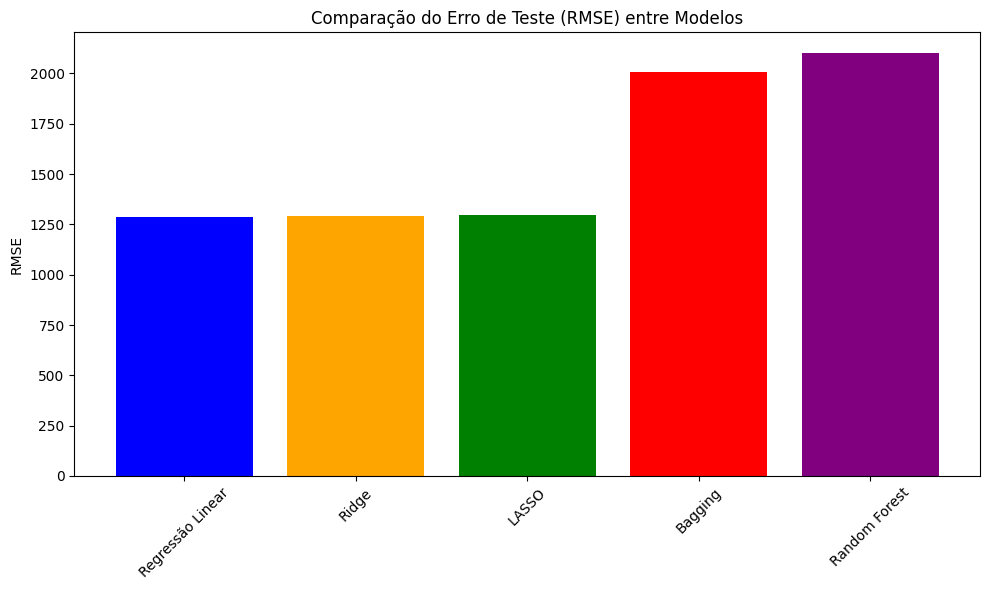

In [17]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))
models = results['Modelo']
rmse_values = results['RMSE']

plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('RMSE')
plt.title('Comparação do Erro de Teste (RMSE) entre Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Terceira atividade

Este exercício utiliza a base de dados de classificação *data_breast_cancer.csv*.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Carregar dados do CSV
data = pd.read_csv('data_breast_cancer.csv')
print("Primeiras linhas do dataset:")
print(data.head())
print(f"\nDimensões do dataset: {data.shape}")

# REMOVER COLUNAS PROBLEMÁTICAS
cols_to_drop = []
if 'id' in data.columns:
    cols_to_drop.append('id')
if 'Unnamed: 32' in data.columns:
    cols_to_drop.append('Unnamed: 32')

data_clean = data.drop(columns=cols_to_drop)
print(f"\nDimensões após remoção de colunas: {data_clean.shape}")

Primeiras linhas do dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

In [20]:
# DEFINIR VARIÁVEIS
X = data_clean.drop('diagnosis', axis=1)
y = data_clean['diagnosis']

print(f"X: {X}")
print(f"y: {y}")

X:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  

In [21]:
# Converter target para numérico
le = LabelEncoder()
y = le.fit_transform(y)
print(f"\nVariável target convertida: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Dividir em treino (50%) e teste (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print(f"\nDivisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"Proporção classes: {pd.Series(y_train).value_counts(normalize=True).values}")

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# INICIALIZAR DICIONÁRIO DE RESULTADOS - CORRIGIDO
results = {}


Variável target convertida: {'B': 0, 'M': 1}

Divisão dos dados:
Treino: 284 amostras
Teste: 285 amostras
Proporção classes: [0.62676056 0.37323944]


- Repetir os itens solicitados no exercício anterior, usando os modelos: Regressão Logística, *Ridge Regression*, *LASSO*, *Bagging* de árvores de classificação e *Random Forests*.

**Regressão Logística:**

In [22]:
# Regressão Logística
print("\n" + "="*60)
print("1. REGRESSÃO LOGÍSTICA")
print("="*60)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Acurácia: {acc_lr:.4f}")
print(f"AUC: {auc_lr:.4f}")

# Armazenar resultados CORRETAMENTE
results['Regressao Logistica'] = {
    'Acurácia': acc_lr,
    'AUC': auc_lr,
    'N_Vars': '-'
}


print("Resultados armazenados:", results['Regressao Logistica'])


1. REGRESSÃO LOGÍSTICA
Acurácia: 0.9719
AUC: 0.9979
Resultados armazenados: {'Acurácia': 0.9719298245614035, 'AUC': 0.9979445557078106, 'N_Vars': '-'}


**Regressão Logística Ridge:**

In [23]:
# Regressão Logística Ridge

print("\n" + "="*60)
print("2. REGRESSÃO LOGÍSTICA RIDGE")
print("="*60)

# Ridge Logistic Regression com validação cruzada
alphas = np.logspace(-3, 3, 10)  # Reduzido para velocidade
ridge_lr_cv = GridSearchCV(
    LogisticRegression(penalty='l2', max_iter=1000, random_state=42, solver='liblinear'), 
    param_grid={'C': 1/np.array(alphas)},
    cv=5, scoring='accuracy'
)
ridge_lr_cv.fit(X_train_scaled, y_train)

best_ridge_lr = ridge_lr_cv.best_estimator_
y_pred_ridge = best_ridge_lr.predict(X_test_scaled)
y_prob_ridge = best_ridge_lr.predict_proba(X_test_scaled)[:, 1]
acc_ridge = accuracy_score(y_test, y_pred_ridge)
auc_ridge = roc_auc_score(y_test, y_prob_ridge)

print(f"Melhor C: {ridge_lr_cv.best_params_['C']:.4f}")
print(f"Acurácia: {acc_ridge:.4f}")
print(f"AUC: {auc_ridge:.4f}")

# Armazenar resultados
results['Ridge Logistic'] = {
    'Acurácia': acc_ridge,
    'AUC': auc_ridge,
    'N_Vars': '-'
}

print("Resultados armazenados:", results['Ridge Logistic'])


2. REGRESSÃO LOGÍSTICA RIDGE
Melhor C: 0.0215
Acurácia: 0.9754
AUC: 0.9985
Resultados armazenados: {'Acurácia': 0.9754385964912281, 'AUC': 0.9985242964056077, 'N_Vars': '-'}


**Regressão Logística LASSO:**

In [24]:
# Regressão Logística LASSO
print("\n" + "="*60)
print("3. REGRESSÃO LOGÍSTICA LASSO")
print("="*60)

# LASSO Logistic Regression com validação cruzada
lasso_lr_cv = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000), 
    param_grid={'C': 1/np.array(alphas)},
    cv=5, scoring='accuracy'
)
lasso_lr_cv.fit(X_train_scaled, y_train)

best_lasso_lr = lasso_lr_cv.best_estimator_
y_pred_lasso = best_lasso_lr.predict(X_test_scaled)
y_prob_lasso = best_lasso_lr.predict_proba(X_test_scaled)[:, 1]
acc_lasso = accuracy_score(y_test, y_pred_lasso)
auc_lasso = roc_auc_score(y_test, y_prob_lasso)

# Número de coeficientes não zero
n_nonzero = np.sum(best_lasso_lr.coef_ != 0)

print(f"Melhor C: {lasso_lr_cv.best_params_['C']:.4f}")
print(f"Acurácia: {acc_lasso:.4f}")
print(f"AUC: {auc_lasso:.4f}")
print(f"Número de coeficientes diferentes de zero: {n_nonzero}")

# Variáveis selecionadas pelo LASSO
lasso_coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': best_lasso_lr.coef_[0]
})
lasso_selected = lasso_coef_df[lasso_coef_df['Coeficiente'] != 0].sort_values('Coeficiente', key=abs, ascending=False)

print("\nTop 5 variáveis selecionadas pelo LASSO:")
print(lasso_selected.head(5))

# Armazenar resultados
results['LASSO Logistic'] = {
    'Acurácia': acc_lasso,
    'AUC': auc_lasso,
    'N_Vars': n_nonzero
}

print("Resultados armazenados:", results['LASSO Logistic'])


3. REGRESSÃO LOGÍSTICA LASSO
Melhor C: 2.1544
Acurácia: 0.9719
AUC: 0.9970
Número de coeficientes diferentes de zero: 18

Top 5 variáveis selecionadas pelo LASSO:
                Variável  Coeficiente
10             radius_se     2.901040
21         texture_worst     2.287947
7    concave points_mean     2.132339
23            area_worst     1.824605
27  concave points_worst     1.765253
Resultados armazenados: {'Acurácia': 0.9719298245614035, 'AUC': 0.9969958891114157, 'N_Vars': np.int64(18)}


**Bagging de árvores de classificação:**

In [25]:
# Bagging de árvores
print("\n" + "="*60)
print("4. BAGGING - ÁRVORES DE CLASSIFICAÇÃO")
print("="*60)

bagging = BaggingClassifier(n_estimators=50, random_state=42)  # Reduzido para velocidade
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)
y_prob_bagging = bagging.predict_proba(X_test)[:, 1]
acc_bagging = accuracy_score(y_test, y_pred_bagging)
auc_bagging = roc_auc_score(y_test, y_prob_bagging)

print(f"Acurácia: {acc_bagging:.4f}")
print(f"AUC: {auc_bagging:.4f}")

# Armazenar resultados
results['Bagging'] = {
    'Acurácia': acc_bagging,
    'AUC': auc_bagging,
    'N_Vars': '-'
}

print("Resultados armazenados:", results['Bagging'])


4. BAGGING - ÁRVORES DE CLASSIFICAÇÃO
Acurácia: 0.9684
AUC: 0.9942
Resultados armazenados: {'Acurácia': 0.968421052631579, 'AUC': 0.9941762411721302, 'N_Vars': '-'}


**Random Forest:**

In [26]:
print("\n" + "="*60)
print("5. RANDOM FOREST")
print("="*60)

# Random Forest com m = √p
m = int(np.sqrt(X.shape[1]))
rf = RandomForestClassifier(n_estimators=100, max_features=m, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Número de variáveis consideradas em cada split (m): {m}")
print(f"✅ Acurácia: {acc_rf:.4f}")
print(f"✅ AUC: {auc_rf:.4f}")

# Importância das variáveis
importance_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf.feature_importances_
}).sort_values('Importância', ascending=False)

print("\nTop 5 variáveis mais importantes (Random Forest):")
print(importance_df.head(5))

# Armazenar resultados
results['Random Forest'] = {
    'Acurácia': acc_rf,
    'AUC': auc_rf,
    'N_Vars': '-'
}

print("Resultados armazenados:", results['Random Forest'])


5. RANDOM FOREST
Número de variáveis consideradas em cada split (m): 5
✅ Acurácia: 0.9649
✅ AUC: 0.9952

Top 5 variáveis mais importantes (Random Forest):
                Variável  Importância
23            area_worst     0.140198
27  concave points_worst     0.110665
7    concave points_mean     0.092185
20          radius_worst     0.081003
2         perimeter_mean     0.078062
Resultados armazenados: {'Acurácia': 0.9649122807017544, 'AUC': 0.9951776114683251, 'N_Vars': '-'}


- Inclua também na sua análise um classificador *SVM (Support Vector Machines)* com kernel de base radial (*RBF*) e parâmetros *C* e γ selecionados por validação cruzada com *k* folds. *C* é o parâmetro que controla o tamanho da margem de separação, enquanto γ é o parâmetro de cobertura da função radial do kernel.

In [30]:
print("\n" + "="*60)
print("6. SVM - KERNEL RBF")
print("="*60)

# SVM com kernel RBF e validação cruzada (grid reduzido para velocidade)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

print("Realizando validação cruzada para SVM...")
svm_cv = GridSearchCV(
    SVC(kernel='rbf', probability=True, random_state=42), 
    param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1  # cv reduzido
)
svm_cv.fit(X_train_scaled, y_train)

best_svm = svm_cv.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_prob_svm = best_svm.predict_proba(X_test_scaled)[:, 1]
acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print(f"Melhor C: {svm_cv.best_params_['C']:.4f}")
print(f"Melhor gamma: {svm_cv.best_params_['gamma']:.4f}")
print(f"Acurácia: {acc_svm:.4f}")
print(f"AUC: {auc_svm:.4f}")

# Armazenar resultados
results['SVM RBF'] = {
    'Acurácia': acc_svm,
    'AUC': auc_svm,
    'N_Vars': '-'
}

print("Resultados armazenados:", results['SVM RBF'])


6. SVM - KERNEL RBF
Realizando validação cruzada para SVM...
Melhor C: 1.0000
Melhor gamma: 0.0100
Acurácia: 0.9649
AUC: 0.9995
Resultados armazenados: {'Acurácia': 0.9649122807017544, 'AUC': 0.9994729630020027, 'N_Vars': '-'}


- Compare a acurácia de teste obtida por todos estes modelos de classificação.

In [31]:
print("\n" + "="*80)
print("COMPARAÇÃO FINAL - TODOS OS MODELOS")
print("="*80)

# Verificar o que há no dicionário results
print("Conteúdo do dicionário 'results':")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

# Criar DataFrame com resultados
results_list = []
for model, metrics in results.items():
    results_list.append({
        'Modelo': model,
        'Acurácia': metrics['Acurácia'],
        'AUC': metrics['AUC'],
        'N_Vars_LASSO': metrics['N_Vars']
    })

results_df = pd.DataFrame(results_list).sort_values('Acurácia', ascending=False)
print(f"Results: {results_df}")


COMPARAÇÃO FINAL - TODOS OS MODELOS
Conteúdo do dicionário 'results':
Regressao Logistica: {'Acurácia': 0.9719298245614035, 'AUC': 0.9979445557078106, 'N_Vars': '-'}
Ridge Logistic: {'Acurácia': 0.9754385964912281, 'AUC': 0.9985242964056077, 'N_Vars': '-'}
LASSO Logistic: {'Acurácia': 0.9719298245614035, 'AUC': 0.9969958891114157, 'N_Vars': np.int64(18)}
Bagging: {'Acurácia': 0.968421052631579, 'AUC': 0.9941762411721302, 'N_Vars': '-'}
Random Forest: {'Acurácia': 0.9649122807017544, 'AUC': 0.9951776114683251, 'N_Vars': '-'}
SVM RBF: {'Acurácia': 0.9649122807017544, 'AUC': 0.9994729630020027, 'N_Vars': '-'}
Results:                 Modelo  Acurácia       AUC N_Vars_LASSO
1       Ridge Logistic  0.975439  0.998524            -
0  Regressao Logistica  0.971930  0.997945            -
2       LASSO Logistic  0.971930  0.996996           18
3              Bagging  0.968421  0.994176            -
4        Random Forest  0.964912  0.995178            -
5              SVM RBF  0.964912  0.9994


TABELA DE RESULTADOS
                Modelo  Acurácia     AUC N_Vars_LASSO
1       Ridge Logistic    0.9754  0.9985            -
0  Regressao Logistica    0.9719  0.9979            -
2       LASSO Logistic    0.9719  0.9970           18
3              Bagging    0.9684  0.9942            -
4        Random Forest    0.9649  0.9952            -
5              SVM RBF    0.9649  0.9995            -


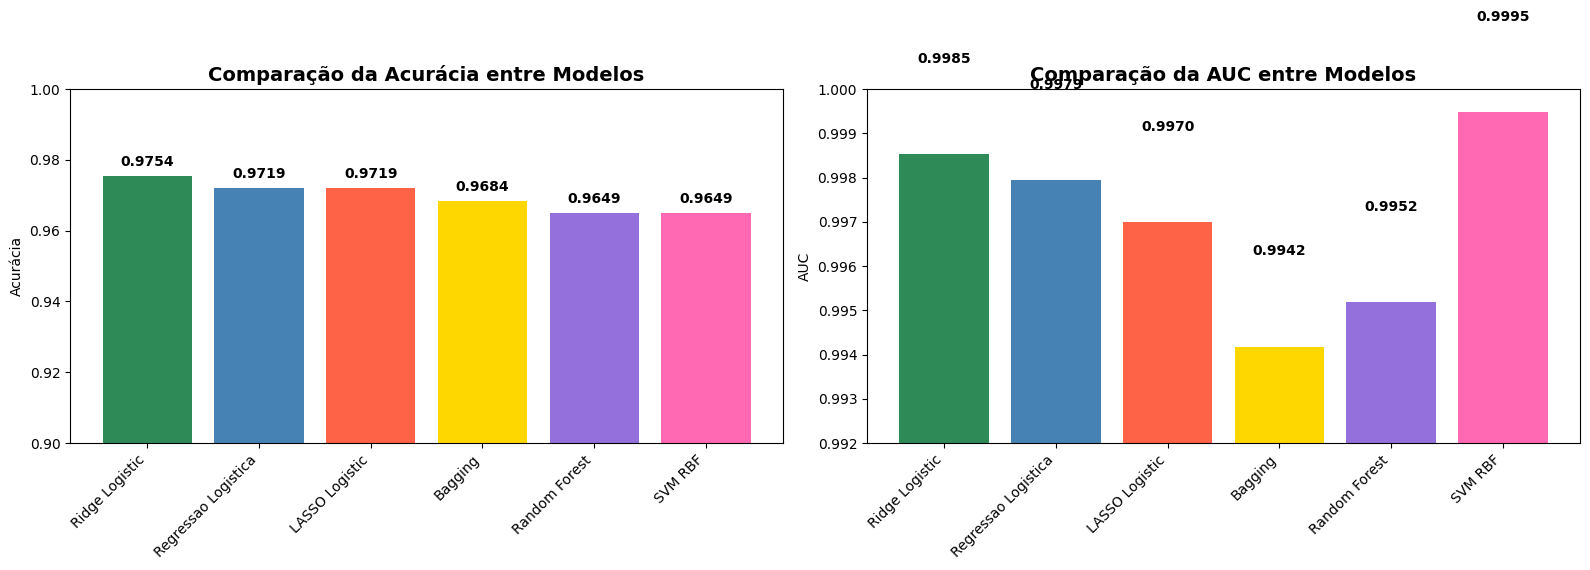

In [32]:
print("\n" + "="*80)
print("TABELA DE RESULTADOS")
print("="*80)
print(results_df.round(4))

# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de acurácia
models = results_df['Modelo']
accuracy_values = results_df['Acurácia']

bars1 = ax1.bar(models, accuracy_values, color=['#2E8B57', '#4682B4', '#FF6347', '#FFD700', '#9370DB', '#FF69B4'])
ax1.set_ylabel('Acurácia')
ax1.set_title('Comparação da Acurácia entre Modelos', fontsize=14, fontweight='bold')
ax1.set_ylim(0.9, 1.0)  # Ajustado para melhor visualização
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.002,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# Gráfico de AUC
auc_values = results_df['AUC']
bars2 = ax2.bar(models, auc_values, color=['#2E8B57', '#4682B4', '#FF6347', '#FFD700', '#9370DB', '#FF69B4'])
ax2.set_ylabel('AUC')
ax2.set_title('Comparação da AUC entre Modelos', fontsize=14, fontweight='bold')
ax2.set_ylim(0.992, 1.0)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.002,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [33]:
# Análise detalhada
print("\n" + "="*80)
print("ANÁLISE DETALHADA DAS PERFORMANCES")
print("="*80)

best_acc_model = results_df.loc[results_df['Acurácia'].idxmax()]
best_auc_model = results_df.loc[results_df['AUC'].idxmax()]

print(f"MELHOR MODELO POR ACURÁCIA: {best_acc_model['Modelo']} ({best_acc_model['Acurácia']:.4f})")
print(f"MELHOR MODELO POR AUC: {best_auc_model['Modelo']} ({best_auc_model['AUC']:.4f})")

# Comparação LASSO vs Random Forest
if 'LASSO Logistic' in results:
    lasso_vars = results['LASSO Logistic']['N_Vars']
    print(f"\n🔍 COMPARAÇÃO SELEÇÃO DE VARIÁVEIS:")
    print(f"LASSO selecionou {lasso_vars} variáveis de {X.shape[1]} total")
    
    if 'lasso_selected' in locals() and len(lasso_selected) > 0:
        lasso_top5 = lasso_selected.head(5)['Variável'].tolist()
        print(f"Top 5 LASSO: {lasso_top5}")
    
    if 'importance_df' in locals() and len(importance_df) > 0:
        rf_top5 = importance_df.head(5)['Variável'].tolist()
        print(f"Top 5 Random Forest: {rf_top5}")
        
        if 'lasso_top5' in locals():
            overlap = set(lasso_top5).intersection(set(rf_top5))
            print(f"Variáveis em comum no top 5: {overlap}")
            print(f"Taxa de sobreposição: {len(overlap)/5*100:.1f}%")


ANÁLISE DETALHADA DAS PERFORMANCES
MELHOR MODELO POR ACURÁCIA: Ridge Logistic (0.9754)
MELHOR MODELO POR AUC: SVM RBF (0.9995)

🔍 COMPARAÇÃO SELEÇÃO DE VARIÁVEIS:
LASSO selecionou 18 variáveis de 30 total
Top 5 LASSO: ['radius_se', 'texture_worst', 'concave points_mean', 'area_worst', 'concave points_worst']
Top 5 Random Forest: ['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']
Variáveis em comum no top 5: {'area_worst', 'concave points_mean', 'concave points_worst'}
Taxa de sobreposição: 60.0%
